In [1]:
import sys 
sys.path.append("..")
import numpy as np
import itertools
from env.windy_gridworld import WindyGridworldEnv
from collections import defaultdict

In [2]:
env = WindyGridworldEnv()
obs_dim = env.observation_space.n
action_dim = env.action_space.n
print(f"obs_dim:{obs_dim},action_dim:{action_dim}")

obs_dim:70,action_dim:4


In [3]:
def get_epsilon_greedy_action(obs, Q_values, epsilon):
    probs = np.ones(action_dim)*(epsilon/action_dim)
    best_action = np.argmax(Q_values[obs])
    probs[best_action] += (1-epsilon)
    epsilon_greedy_action = np.random.choice(np.arange(action_dim), p=probs)
    return epsilon_greedy_action

In [4]:
def SARSA(env, num_episode, epsilon, discount_factor, alpha):
    Q_values = defaultdict(lambda: np.zeros(action_dim))
    episode_rewards = []
    episode_lengths = []
    for i in range(num_episode):
        episode_reward = 0
        obs = env.reset()
        action = get_epsilon_greedy_action(obs, Q_values, epsilon)
        for step in itertools.count():
            next_obs, reward, done, _ = env.step(action)
            episode_reward += reward
            next_action = get_epsilon_greedy_action(next_obs, Q_values, epsilon)
            Q_values[obs][action] += alpha*(reward+discount_factor*Q_values[next_obs][next_action]-Q_values[obs][action])
            obs = next_obs
            action = next_action
            if done:
                episode_rewards.append(episode_reward)
                episode_lengths.append(step+1)
                break
    return episode_rewards, episode_lengths

#### SARSA
+ 不需要环境的状态转移模型，是不基于模型的强化学习方法
+ 属于在线时序差分法，迭代价值函数的方式

In [5]:
episode_rewards, episode_lengths = SARSA(env, num_episode=200, epsilon=0.1, discount_factor=1.0, alpha=0.5)

import matplotlib.pyplot as plt
episodes = np.arange(len(episode_lengths))

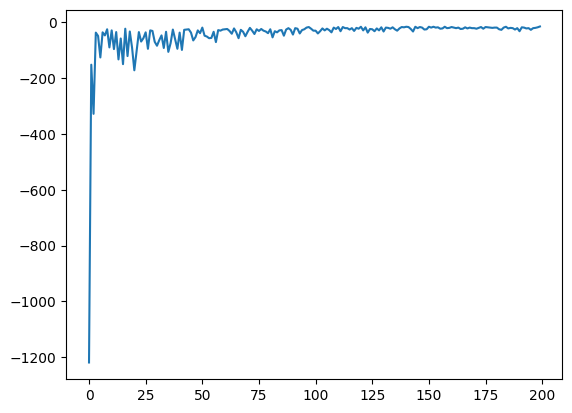

In [6]:
plt.plot(episodes, episode_rewards)

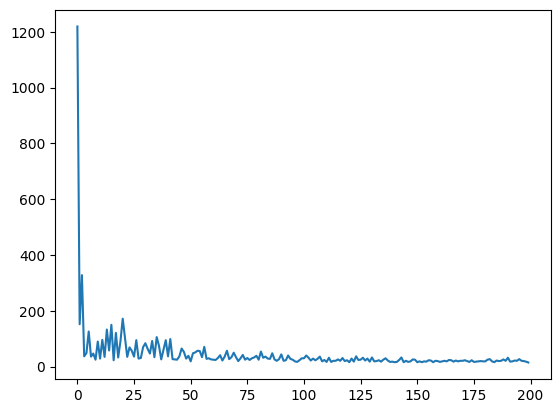

In [7]:
plt.plot(episodes, episode_lengths)